# Classification algorithms in Wine Quality dataset

## Import libraries and dataset

### Import libraries

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

### Import dataset

In [116]:
dataset = pd.read_csv("./winequalityN.csv")
dataset.dropna(inplace=True)

In [84]:
dataset["quality"].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

## EDA

### Print some values in the dataset

In [5]:
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

### Describe the data in our dataset

In [21]:
print(dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

### Distribution of quality

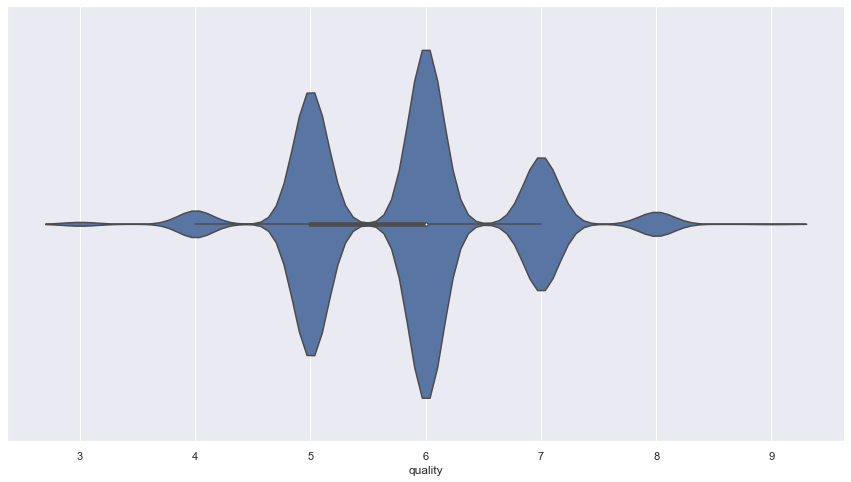

In [86]:
g = sns.violinplot(x=dataset["quality"])
plt.show()

Most of wines have a quality between 5 and 7, only a few have more than 8 and none of them a quality of 10

### Correlation matrix

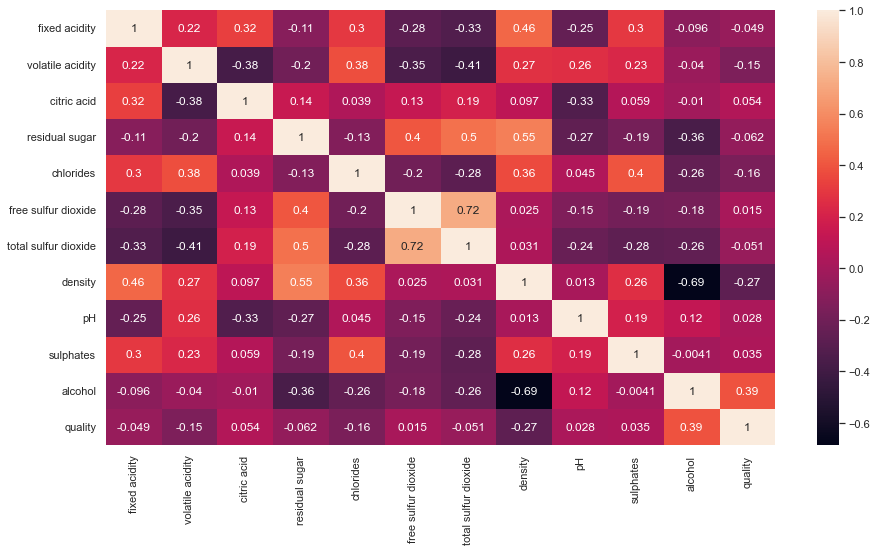

In [52]:
sns.set(rc = {'figure.figsize':(15,8)})
corr_matrix = dataset.corr()
g = sns.heatmap(corr_matrix, annot=True)
plt.show()

We don't see so much positive or negative correlation between features (>0.9)

## Convert to a classification problem

In [117]:
dataset["quality"] = [2 if x in range(7,11) else 1 if x in range(5,7) else 0 for x in dataset['quality']]

I'll arbitrary give a 2 (good wine) to wines with quality of 7 or higher, a 1 (average) to wines between 4 and 7 and 0 (bad) to wines with quality lesser than 5

In [118]:
dataset["quality"].value_counts()

1    4948
2    1271
0     244
Name: quality, dtype: int64

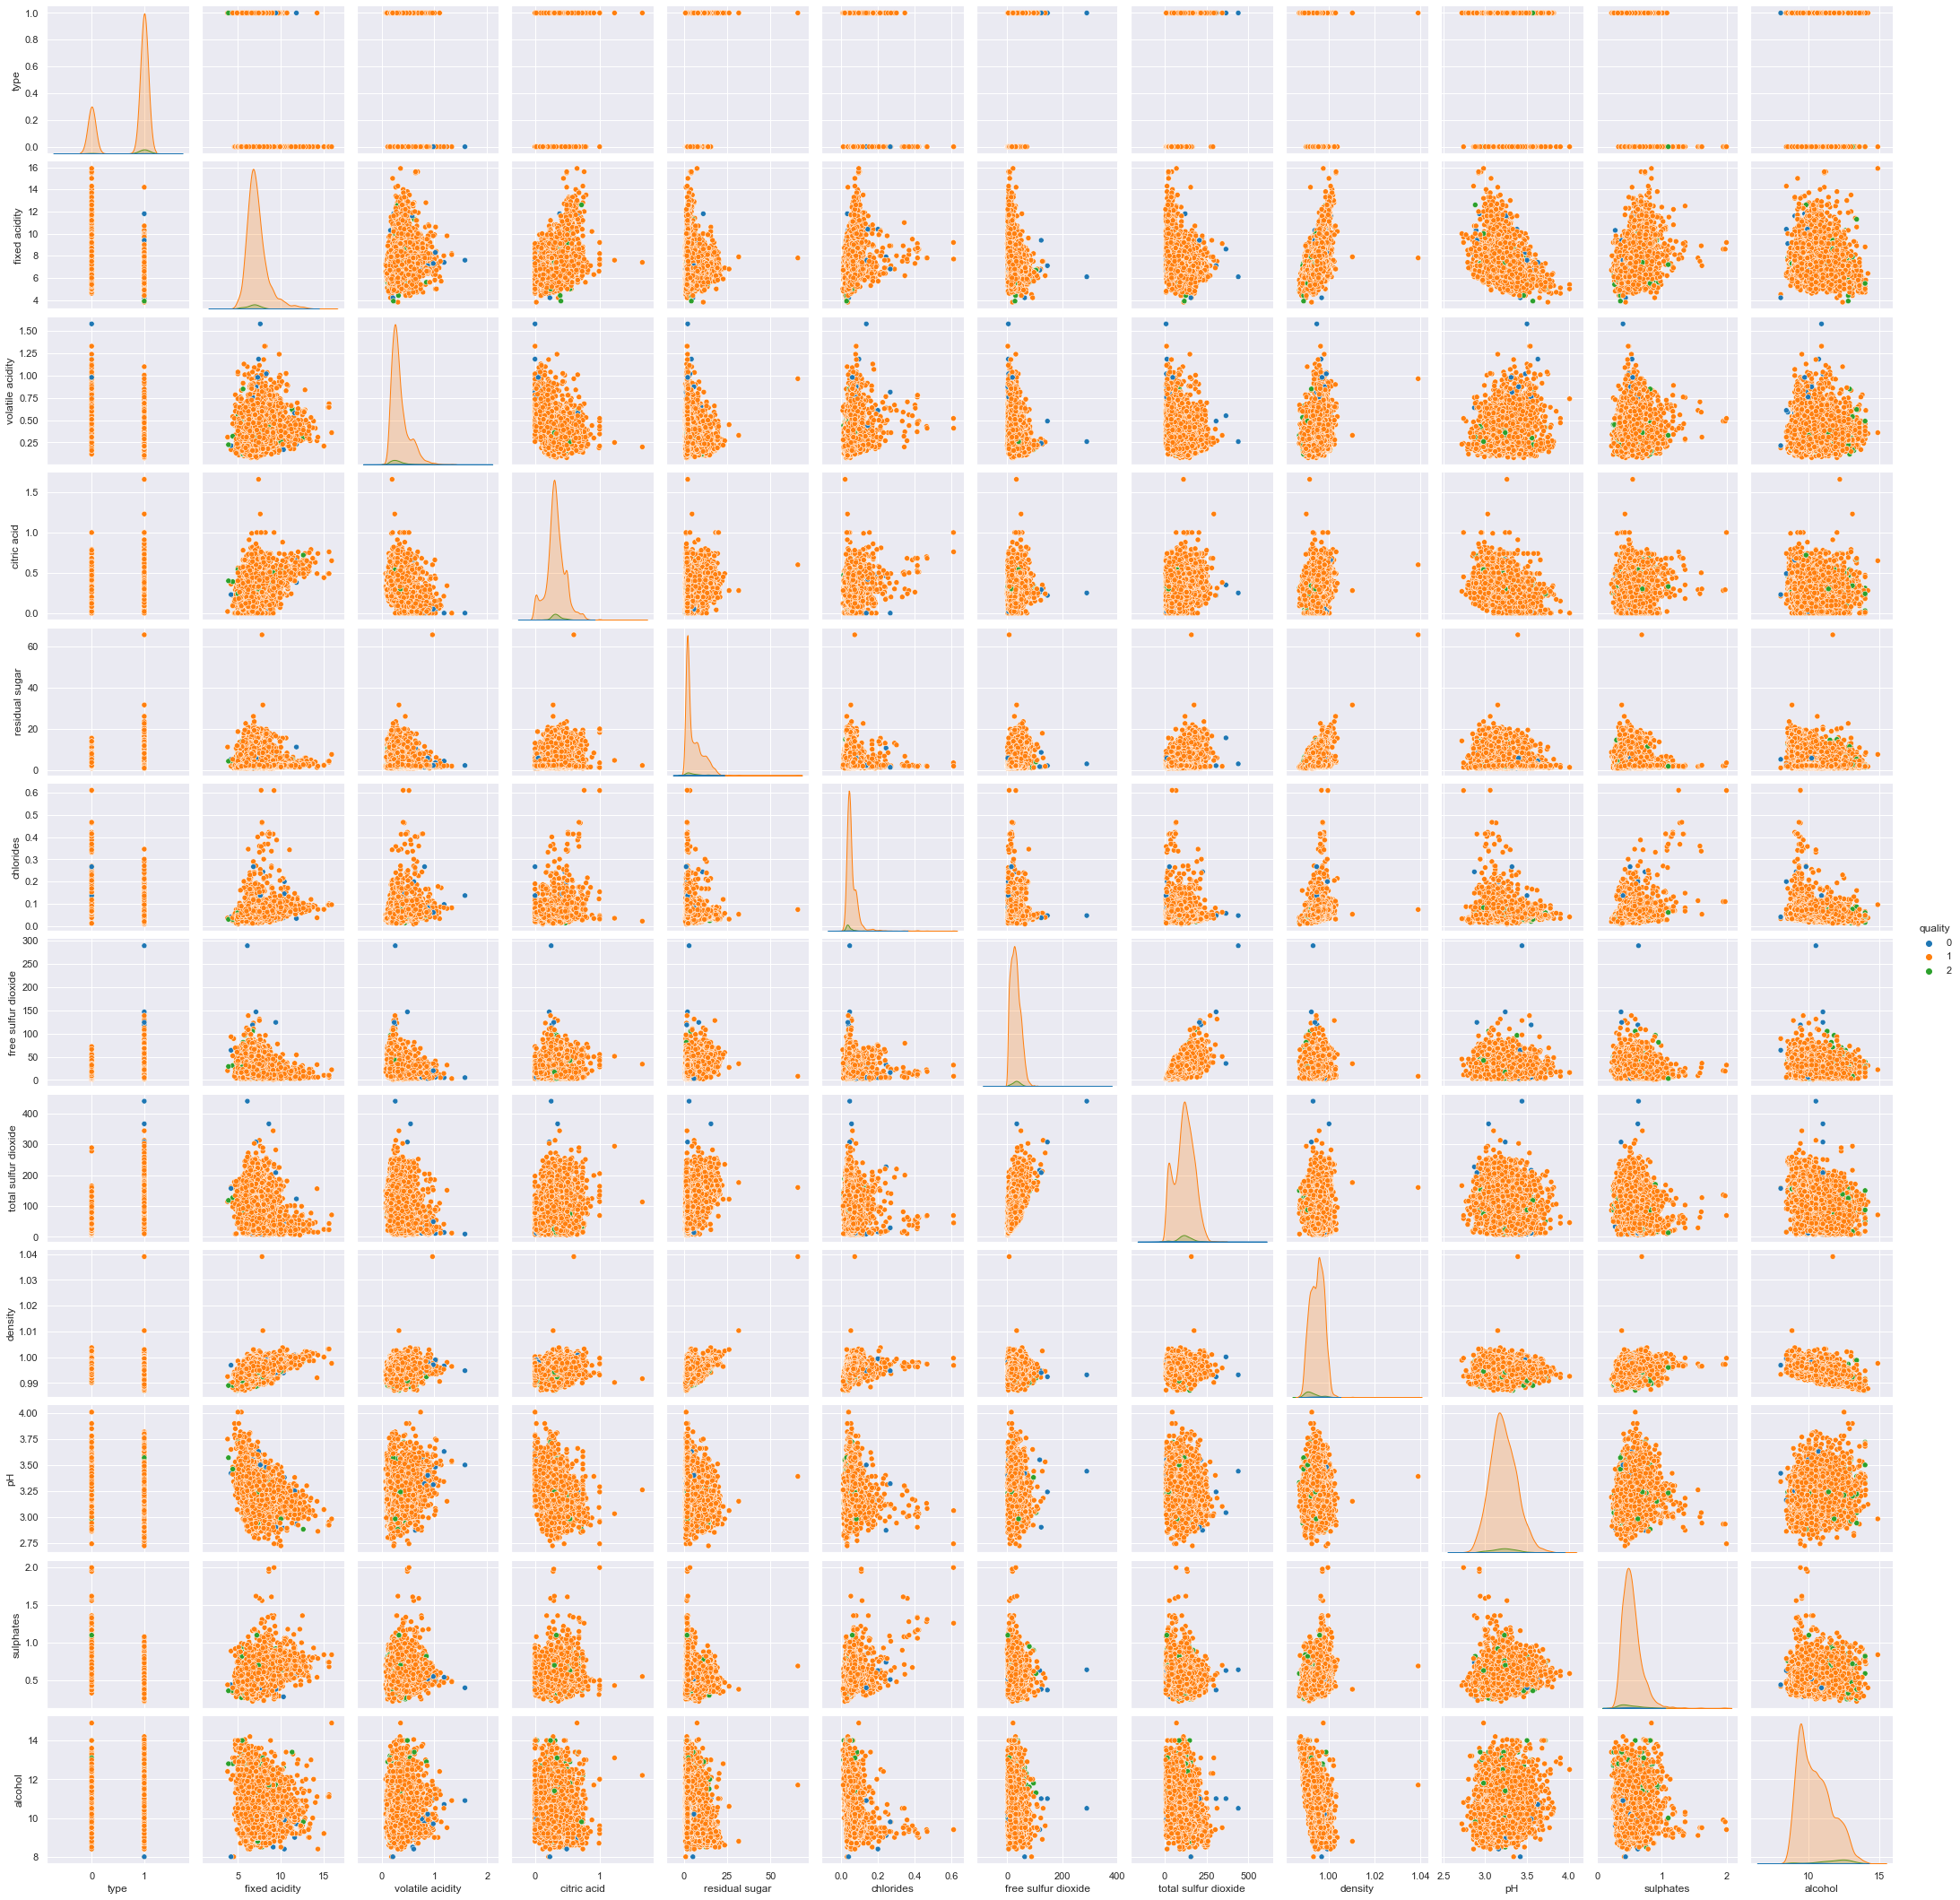

In [94]:
g = sns.pairplot(dataset, hue="quality",palette="tab10")
plt.show()

We observe the few values which quality take value disctint of 2

## Apply classification algorithms

### Split, scale and encode our categorical feature

In [119]:
scaler = StandardScaler()
encoder = OrdinalEncoder()
dataset["type"] = encoder.fit_transform(dataset[["type"]])
X = dataset.drop("type",axis="columns").iloc[:,:-1].values
X = scaler.fit_transform(X)
y = dataset.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


### 

In [120]:
classification_model = LogisticRegression(max_iter=10000)

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.7733952049497294
Confusion matrix
[[  0  46   0]
 [  2 948  54]
 [  0 191  52]]
Classifcation report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.80      0.94      0.87      1004
           2       0.49      0.21      0.30       243

    accuracy                           0.77      1293
   macro avg       0.43      0.39      0.39      1293
weighted avg       0.71      0.77      0.73      1293



In [121]:
classification_model = DecisionTreeClassifier(criterion="gini")

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

Accuracy: 0.7726218097447796
Confusion matrix
[[ 10  29   7]
 [ 43 853 108]
 [  7 100 136]]
Classifcation report
              precision    recall  f1-score   support

           0       0.17      0.22      0.19        46
           1       0.87      0.85      0.86      1004
           2       0.54      0.56      0.55       243

    accuracy                           0.77      1293
   macro avg       0.53      0.54      0.53      1293
weighted avg       0.78      0.77      0.78      1293



In [131]:
classification_model = KNeighborsClassifier(n_neighbors=5)

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

Accuracy: 0.8081979891724671
Confusion matrix
[[  6  38   2]
 [  6 915  83]
 [  1 118 124]]
Classifcation report
              precision    recall  f1-score   support

           0       0.46      0.13      0.20        46
           1       0.85      0.91      0.88      1004
           2       0.59      0.51      0.55       243

    accuracy                           0.81      1293
   macro avg       0.64      0.52      0.54      1293
weighted avg       0.79      0.81      0.80      1293



### Support vector machine

In [123]:
classification_model = SVC(kernel="linear")

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.7764887857695282
Confusion matrix
[[   0   46    0]
 [   0 1004    0]
 [   0  243    0]]
Classifcation report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.78      1.00      0.87      1004
           2       0.00      0.00      0.00       243

    accuracy                           0.78      1293
   macro avg       0.26      0.33      0.29      1293
weighted avg       0.60      0.78      0.68      1293



/Users/gaston/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gaston/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gaston/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Kernel SVM

In [124]:
classification_model = SVC(kernel="rbf")

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.7950502706883217
Confusion matrix
[[  0  46   0]
 [  0 963  41]
 [  0 178  65]]
Classifcation report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.81      0.96      0.88      1004
           2       0.61      0.27      0.37       243

    accuracy                           0.80      1293
   macro avg       0.47      0.41      0.42      1293
weighted avg       0.75      0.80      0.75      1293



/Users/gaston/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gaston/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gaston/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [129]:
classification_model = RandomForestClassifier(criterion="entropy",n_estimators=1000)

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.851508120649652
Confusion matrix
[[  4  41   1]
 [  1 973  30]
 [  0 119 124]]
Classifcation report
              precision    recall  f1-score   support

           0       0.80      0.09      0.16        46
           1       0.86      0.97      0.91      1004
           2       0.80      0.51      0.62       243

    accuracy                           0.85      1293
   macro avg       0.82      0.52      0.56      1293
weighted avg       0.85      0.85      0.83      1293



### Naive Bayes

In [126]:
classification_model = GaussianNB()

classification_model.fit(X_train,y_train)

y_pred = classification_model.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Classifcation report")
print(classification_report(y_test,y_pred))

Accuracy: 0.6921887084300077
Confusion matrix
[[  8  31   7]
 [ 55 731 218]
 [  5  82 156]]
Classifcation report
              precision    recall  f1-score   support

           0       0.12      0.17      0.14        46
           1       0.87      0.73      0.79      1004
           2       0.41      0.64      0.50       243

    accuracy                           0.69      1293
   macro avg       0.46      0.51      0.48      1293
weighted avg       0.75      0.69      0.71      1293

